# DEDDIAG, a domestic electricity demand dataset of individual appliances in Germany
The dataset contains recordings of 15 homes over a period of up to 3.5 years, wherein total 50 appliances have been recorded at a frequency of 1 Hz. Recorded appliances are of significance for load-shifting purposes such as dishwashers, washing machines and refrigerators. One home also includes three-phase mains readings that can be used for disaggregation tasks. Additionally, DEDDIAG contains manual ground truth event annotations for 14 appliances, that provide precise start and stop timestamp.

The system used to collect the dataset can be found on [deddiag.github.io](https://deddiag.github.io/)

## Dataset Structure
```
/
|- house_00/
   |- house.tsv.................................HOUSE DESCRIPTION
   |- items.tsv.................................APPLIANCE DESCRIPTIONS
   |- item_0001_data.tsv.gz.....................POWER MEASUREMENTS
   |- item_0001_annotations.tsv.................ANNOTATIONS
   |- item_0001_annotation_labels.tsv...........ANNOTATION LABELS
   |- item_XXXX_data.tsv.gz
   |- item_XXXX_annotations.tsv
   |- item_XXXX_annotation_labels.tsv
|- house_XX/
   |- ...
|- import.sh....................................IMPORT SCRIPT
|- create_tables_0.sql..........................DATABASE TABLES
|- create_tables_1.sql..........................DATABASE INDICES AND FUNCTIONS
|- README.md....................................DATASET DESCRIPTION
```


## Create database
Data can be imported to a postgres database. 
The provided import script assumes importing the data into a docker container.
Help on how to use docker can be found [here](https://docs.docker.com/get-started/overview/).

Create PostgreSQL container: 
```
docker run -d --name deddiagdb -p 127.0.0.1:5432:5432 -e POSTGRES_PASSWORD=password postgres
```

Additionally the postgres instance may be optimized by increasing buffer sizes.
The following values are only suggestions and need to be adjusted depending on available system memory. 
Be aware that `work_mem` is the maximum amount of memory to be used by a query operation which can very quickly add up.
If your system has a large amount of memory, e.g. `>256GB`, you may use a higher limit such as `10GB`.
please consult the [postgres manual](https://www.postgresql.org/docs/current/runtime-config-resource.html) for more information.
 
```
echo "alter system set shared_buffers='256MB';" | docker exec deddiagdb psql -U postgres
echo  "alter system set work_mem='1GB';" | docker exec deddiagdb psql -U postgres
```

## Import data to docker instance
Each house is packaged into a separate ZIP-Archive, the import script will import all unzipped archives:  ```house_00/, house_01/, ...```.

Run the `import.sh` script

**Important:** The uncompressed measurements are very large and require > 139GB of disc space. The import will take several hours.   

```
./import.sh
```

## Data description
The data set contains power measurements from homes in Germany.
Measurements are recorded in a 'lazy' manor, meaning only value changes are stored.

| House | Item id | Name | Category | First Measurement | Last Measurement | Duration | 
| --- | --- | --- | --- | --- | --- | --- |
| 0 |  10 | **Refrigerator** | **Refrigerator** | 2016-11-30 | 2019-06-02 | 913 days |
| --- | | | | | | |
| 1 |  1 | **Refrigerator** | **Refrigerator** | 2016-10-06 | 2017-04-11 | 186 days |
| 1 |  2 | Washing Machine | Washing Machine | 2017-02-18 | 2017-04-11 | 51 days |
| 1 |  4 | Bosch | Dish Washer | 2016-10-06 | 2017-04-11 | 186 days |
| --- | | | | | | |
| 2 |  11 | Freezer | Freezer | 2016-12-08 | 2020-08-21 | 1351 days |
| 2 |  12 | Washing Machine | Washing Machine | 2016-12-08 | 2018-12-14 | 735 days |
| --- | | | | | | |
| 3 |  13 | Miele F 12020 S-3 | Freezer | 2017-01-07 | 2018-05-27 | 504 days |
| 3 |  14 | Bosch Maxx 6 ecoSpar | Washing Machine | 2016-12-20 | 2019-07-13 | 935 days |
| 3 |  16 | Miele K14827 SD ED/CS | **Refrigerator** | 2017-01-07 | 2019-07-13 | 917 days |
| --- | | | | | | |
| 4 |  17 | Liebherr KTS14* | **Refrigerator** | 2017-04-17 | 2020-11-16 | 1308 days |
| 4 |  18 | AEG arctis | Freezer | 2017-04-17 | 2020-12-09 | 1331 days |
| 4 |  19 | Bosch | Dish Washer | 2017-04-17 | 2020-12-09 | 1331 days |
| 4 |  20 | AEG Lavamat Exclusive 54569 Electronic | Washing Machine | 2017-04-17 | 2020-12-09 | 1331 days |
| --- | | | | | | |
| 5 |  5 | Bosch SMS69N48EU | Dish Washer | 2016-08-10 | 2019-01-18 | 890 days |
| 5 |  6 | Miele SOFTTRONIC W2241 | Washing Machine | 2016-08-16 | 2019-01-17 | 884 days |
| 5 |  8 | Office Desk | Office Desk | 2016-12-06 | 2019-01-18 | 772 days |
| 5 |  9 | Bauknecht | **Refrigerator** | 2016-08-10 | 2019-01-18 | 890 days |
| 5 |  30 | Bezzera BZ09 | Coffee Machine | 2017-06-28 | 2019-01-18 | 568 days |
| --- | | | | | | |
| 6 |  31 | Dish Washer | Dish Washer | 2017-07-22 | 2018-02-02 | 194 days |
| 6 |  32 | **Refrigerator** | **Refrigerator** | 2017-07-22 | 2018-02-02 | 194 days |
| 6 |  33 | Miele Novotronic W1514 | Washing Machine | 2017-07-22 | 2017-08-12 | 21 days |
| 6 |  34 | Miele Novotronic T7644C | Dryer | 2017-07-22 | 2018-02-01 | 194 days |
| 6 |  36 | Siemens Extrakl. Festival Spuler | Dish Washer | 2017-07-26 | 2018-02-02 | 190 days |
| 6 |  37 | Haier HEC MCS662FIX | **Refrigerator** | 2017-07-26 | 2018-03-05 | 221 days |
| --- | | | | | | |
| 7 |  68 | Miele Hydromatic W701 | Washing Machine | 2017-10-08 | 2020-12-09 | 1157 days |
| 7 |  69 | Whirlpool | Other | 2017-10-08 | 2018-07-20 | 284 days |
| 7 |  70 | Sony KDL-48W605B | TV | 2017-10-08 | 2020-05-04 | 938 days |
| 7 |  71 | Saeco Magic Comfort+ | Coffee Machine | 2017-10-08 | 2020-12-09 | 1157 days |
| --- | | | | | | |
| 8 |  24 | Miele W 5873 WPS Edition 111 | Washing Machine | 2017-06-06 | 2018-07-28 | 416 days |
| 8 |  26 | Dish Washer | Dish Washer | 2017-06-18 | 2018-07-28 | 404 days |
| 8 |  27 | Bezzera Mitica Top MN | Coffee Machine | 2017-06-18 | 2018-07-28 | 404 days |
| 8 |  28 | Office Desk | Office Desk | 2017-06-18 | 2018-07-28 | 404 days |
| 8 |  35 | **Refrigerator** | **Refrigerator** | 2017-07-23 | 2018-07-28 | 369 days |
| 8 |  51 | Modbus Smart Meter Phase 1 | Smart Meter Phase | 2017-09-05 | 2018-07-28 | 325 days |
| 8 |  52 | Modbus Smart Meter Phase 2 | Smart Meter Phase | 2017-09-05 | 2018-07-28 | 325 days |
| 8 |  53 | Modbus Smart Meter Phase 3 | Smart Meter Phase | 2017-09-05 | 2018-07-28 | 325 days |
| 8 |  59 | Modbus Smart Meter Total | Smart Meter Total | 2017-09-12 | 2018-07-28 | 318 days |
| --- | | | | | | |
| 9 |  44 | Dish Washer | Dish Washer | 2017-08-05 | 2019-02-03 | 546 days |
| 9 |  45 | **Refrigerator** | **Refrigerator** | 2017-08-05 | 2020-03-17 | 954 days |
| 9 |  46 | Washing Machine | Washing Machine | 2017-08-05 | 2020-03-17 | 954 days |
| --- | | | | | | |
| 10 |  65 | **Refrigerator** | **Refrigerator** | 2017-09-20 | 2019-11-01 | 771 days |
| 10 |  66 | Dish Washer | Dish Washer | 2017-09-20 | 2019-11-01 | 771 days |
| 10 |  67 | Washing Machine | Washing Machine | 2017-09-20 | 2019-11-01 | 771 days |
| --- | | | | | | |
| 11 |  38 | Dryer | Dryer | 2017-07-27 | 2017-12-15 | 140 days |
| --- | | | | | | |
| 12 |  61 | Washing Machine | Washing Machine | 2017-09-13 | 2018-07-31 | 320 days |
| 12 |  62 | Dish Washer | Dish Washer | 2017-09-13 | 2018-07-31 | 320 days |
| 12 |  63 | Dryer | Dryer | 2017-09-13 | 2018-07-31 | 320 days |
| 12 |  64 | **Refrigerator** | **Refrigerator** | 2017-09-13 | 2018-07-31 | 320 days |
| --- | | | | | | |
| 13 |  39 | Washing Machine | Washing Machine | 2017-07-30 | 2018-10-06 | 433 days |
| 13 |  40 | Dish Washer | Dish Washer | 2017-07-30 | 2018-10-06 | 433 days |
| 13 |  41 | **Refrigerator** | **Refrigerator** | 2017-07-30 | 2018-10-06 | 433 days |
| --- | | | | | | |
| --- | | | | | | |
| 14 |  81 | Heat Pump | Other | 2017-10-24 | 2019-10-14 | 720 days |
| 14 |  82 | **Refrigerator** | **Refrigerator** | 2017-11-10 | 2020-12-09 | 1124 days |
| 14 |  83 | Washing Machine | Washing Machine | 2017-11-12 | 2020-12-09 | 1122 days |
| --- | | | | | | |



## Query Data
Since data is measured in a lazy manor where only changes are recorded, you have to use the get_measurements(item_id, from_time, to_time) function to retrieve gap filled data.
The function returns a value for each second rounded to seconds.

Sample query for item 19
```
SELECT * FROM get_measurements(19,'2017-04-19T06:06:00','2017-04-19T06:07:00');
```

Get houses and demographic data
```
"SELECT id, json_array_elements(persons) FROM houses"
```

## Authors
* [Marc Wenninger](https://orcid.org/0000-0003-2690-9434) - [Rosenheim Technical University of Applied Sciences](https://www.th-rosenheim.de/en/rosenheim-university-of-applied-sciences/faculties-institutes/faculty-of-computer-science/)
* [Andreas Maier](https://orcid.org/0000-0002-9550-5284) - [Friedrich-Alexander-University Erlangen-Nürnberg](https://lme.tf.fau.de/)
* [Jochen Schmidt](https://orcid.org/0000-0001-5645-5520) - [Rosenheim Technical University of Applied Sciences](https://www.th-rosenheim.de/en/rosenheim-university-of-applied-sciences/faculties-institutes/faculty-of-computer-science/)

## Acknowledgments
Major parts of this work were funded by the German Federal Ministry of Education and Research (BMBF), grant [01LY1506](https://foerderportal.bund.de/foekat/jsp/SucheAction.do?actionMode=view&fkz=01LY1506B),and supported by the [Bayerische Wissenschaftsforum](https://energie.baywiss.de/) (BayWISS). 
Furthermore, we thank all participating households for their data donation and all students involved in the system development.


## License
CC BY 4.0 licensed as found in the LICENSE file.


In [1]:
house_item = {0:[10], 1:[1], 3:[16], 4:[17], 5:[9], 6:[32, 37], 8:[35], 9:[45], 10:[65], 12:[64], 13:[41], 14:[82]}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 경로 -> 시간순으로 정렬된 파일 return
def refridge_data(path):
    tsvdata = pd.read_csv(path, sep='\t')
    # tsvdata = tsvdata[['time', 'value']]
    tsvdata = tsvdata.sort_values(by='time').reset_index(drop=True)
    time_col = np.array(tsvdata['time'], dtype='datetime64[s]')
    tsvdata['time'] = time_col
    return tsvdata

In [348]:
# temp = refridge_data("./house_00/item_0010_data.tsv")
temp = refridge_data("./house_01/item_0001_data.tsv")

In [342]:
temp.to_csv("./test.tsv", sep='\t')

In [35]:
annotations = pd.read_csv('./house_00/house.tsv', sep='\t')#['persons'][0]

In [40]:
annotations['persons'][0]

'[{"absence_duration": "half-day", "age": "50-65", "regularity_of_absence": "limited regular"}, {"absence_duration": "half-day", "age": "50-65", "regularity_of_absence": "regular"}, {"absence_duration": "whole day", "age": "12-18", "regularity_of_absence": "limited regular"}, {"absence_duration": "whole day", "age": "12-18", "regularity_of_absence": "limited regular"}]'

In [ ]:
# annotations
annotations.sort_values('id')

,id,item_id,label_id,start_date,stop_date


In [41]:
for house_num in house_item:
    for item_num in house_item[house_num]: 
        fridge = refridge_data(f"./house_{format(house_num, '02')}/item_{format(item_num, '04')}_data.tsv")
        fridge.to_csv(f"./refridgerator_data/house_{format(house_num, '02')}_item_{format(item_num, '04')}_data.tsv")

In [71]:
import json

In [102]:
resident_info = pd.DataFrame(columns=['house', 'absence_duration', 'age', 'regularity_of_absence'], index=[i for i in range(1, 30)])

In [103]:
resident_info.iloc[0,:]

house                    NaN
absence_duration         NaN
age                      NaN
regularity_of_absence    NaN
Name: 1, dtype: object

In [104]:
idx = 0
for house_num in house_item:
    # for item_num in house_item[house_num]:
         
    house_data = pd.read_csv(f"./house_{format(house_num, '02')}/house.tsv", sep='\t')
    
    try:
        residents = eval(house_data['persons'][0])
        for resident in residents:
            resident_info.iloc[idx, :] = [house_num, resident['absence_duration'],resident['age'],resident['regularity_of_absence']]
            idx+=1
    except:
        pass
print(resident_info)

   house    absence_duration    age regularity_of_absence
1      0            half-day  50-65       limited regular
2      0            half-day  50-65               regular
3      0           whole day  12-18       limited regular
4      0           whole day  12-18       limited regular
5      1           whole day  18-30               regular
6      1            half-day  18-30               regular
7      1           whole day  18-30       limited regular
8      3  more than half-day  30-50               regular
9      3            half-day  30-50               regular
10     4              rarely  50-65             irregular
11     4              rarely    >65             irregular
12     4           whole day  18-30       limited regular
13     5           whole day  18-30               regular
14     5  more than half-day  30-50             irregular
15     6           whole day  30-50               regular
16     6  less than half-day  30-50       limited regular
17     6      

In [107]:
resident_info.to_csv('./resident_info.csv', index=False)

In [13]:
import glob
import os
import pandas as pd
import numpy as np
fridge_path = glob.glob(os.path.join('refridgerator_data', 'house*data.tsv'))


In [147]:
def remove_duplicates(df):
    return df[~df.index.duplicated(keep='first')]

In [ ]:
def weekdays(df):
    

In [76]:
fridge_00_10 = pd.read_csv(fridge_path[0], index_col=2)

In [149]:
temp = remove_duplicates(fridge_00_10)

In [173]:
temp.index

Index(['2016-11-30 20:24:04', '2016-11-30 20:24:05', '2016-11-30 20:24:25',
       '2016-11-30 20:24:27', '2016-11-30 20:24:45', '2016-11-30 20:24:46',
       '2016-11-30 20:24:47', '2016-11-30 20:24:48', '2016-11-30 20:25:05',
       '2016-11-30 20:25:06',
       ...
       '2019-06-02 17:56:07', '2019-06-02 17:56:08', '2019-06-02 17:56:09',
       '2019-06-02 17:56:10', '2019-06-02 17:56:11', '2019-06-02 17:56:12',
       '2019-06-02 17:56:13', '2019-06-02 17:56:14', '2019-06-02 17:56:15',
       '2019-06-02 17:56:16'],
      dtype='object', name='time', length=33853787)

In [212]:
temp_nostandby = temp[temp['value'] >= 1]

In [227]:
temp_standby = temp[temp['value'] < 1]

(array([2.5923943e+07, 2.3570000e+03, 7.4200000e+03, 2.6890000e+03,
        1.3360000e+03, 4.3250000e+03, 2.4603200e+05, 2.1309390e+06,
        1.5613580e+06, 2.7946280e+06, 1.0916100e+06, 2.7241000e+04,
        1.4080000e+04, 6.9520000e+03, 9.5410000e+03, 3.5220000e+03,
        1.2930000e+03, 5.3500000e+02, 3.7300000e+02, 3.3200000e+02,
        3.0700000e+02, 2.6400000e+02, 2.8200000e+02, 2.4500000e+02,
        2.3900000e+02, 2.4000000e+02, 2.3000000e+02, 1.9500000e+02,
        2.0800000e+02, 1.9600000e+02, 2.4300000e+02, 2.1900000e+02,
        1.9600000e+02, 1.8700000e+02, 2.2000000e+02, 1.8100000e+02,
        2.2200000e+02, 1.9600000e+02, 1.9300000e+02, 1.9400000e+02,
        1.8800000e+02, 2.0900000e+02, 1.9600000e+02, 1.7600000e+02,
        2.0600000e+02, 2.2400000e+02, 1.8700000e+02, 1.9400000e+02,
        1.9700000e+02, 1.8400000e+02, 2.0000000e+02, 1.9400000e+02,
        2.0300000e+02, 2.2500000e+02, 2.1200000e+02, 2.8500000e+02,
        2.6100000e+02, 2.2100000e+02, 2.0300000e

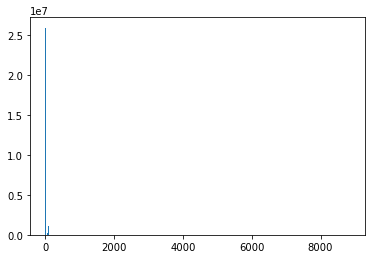

In [208]:
plt.hist(temp['value'] , bins=1000)

In [184]:
from collections import defaultdict

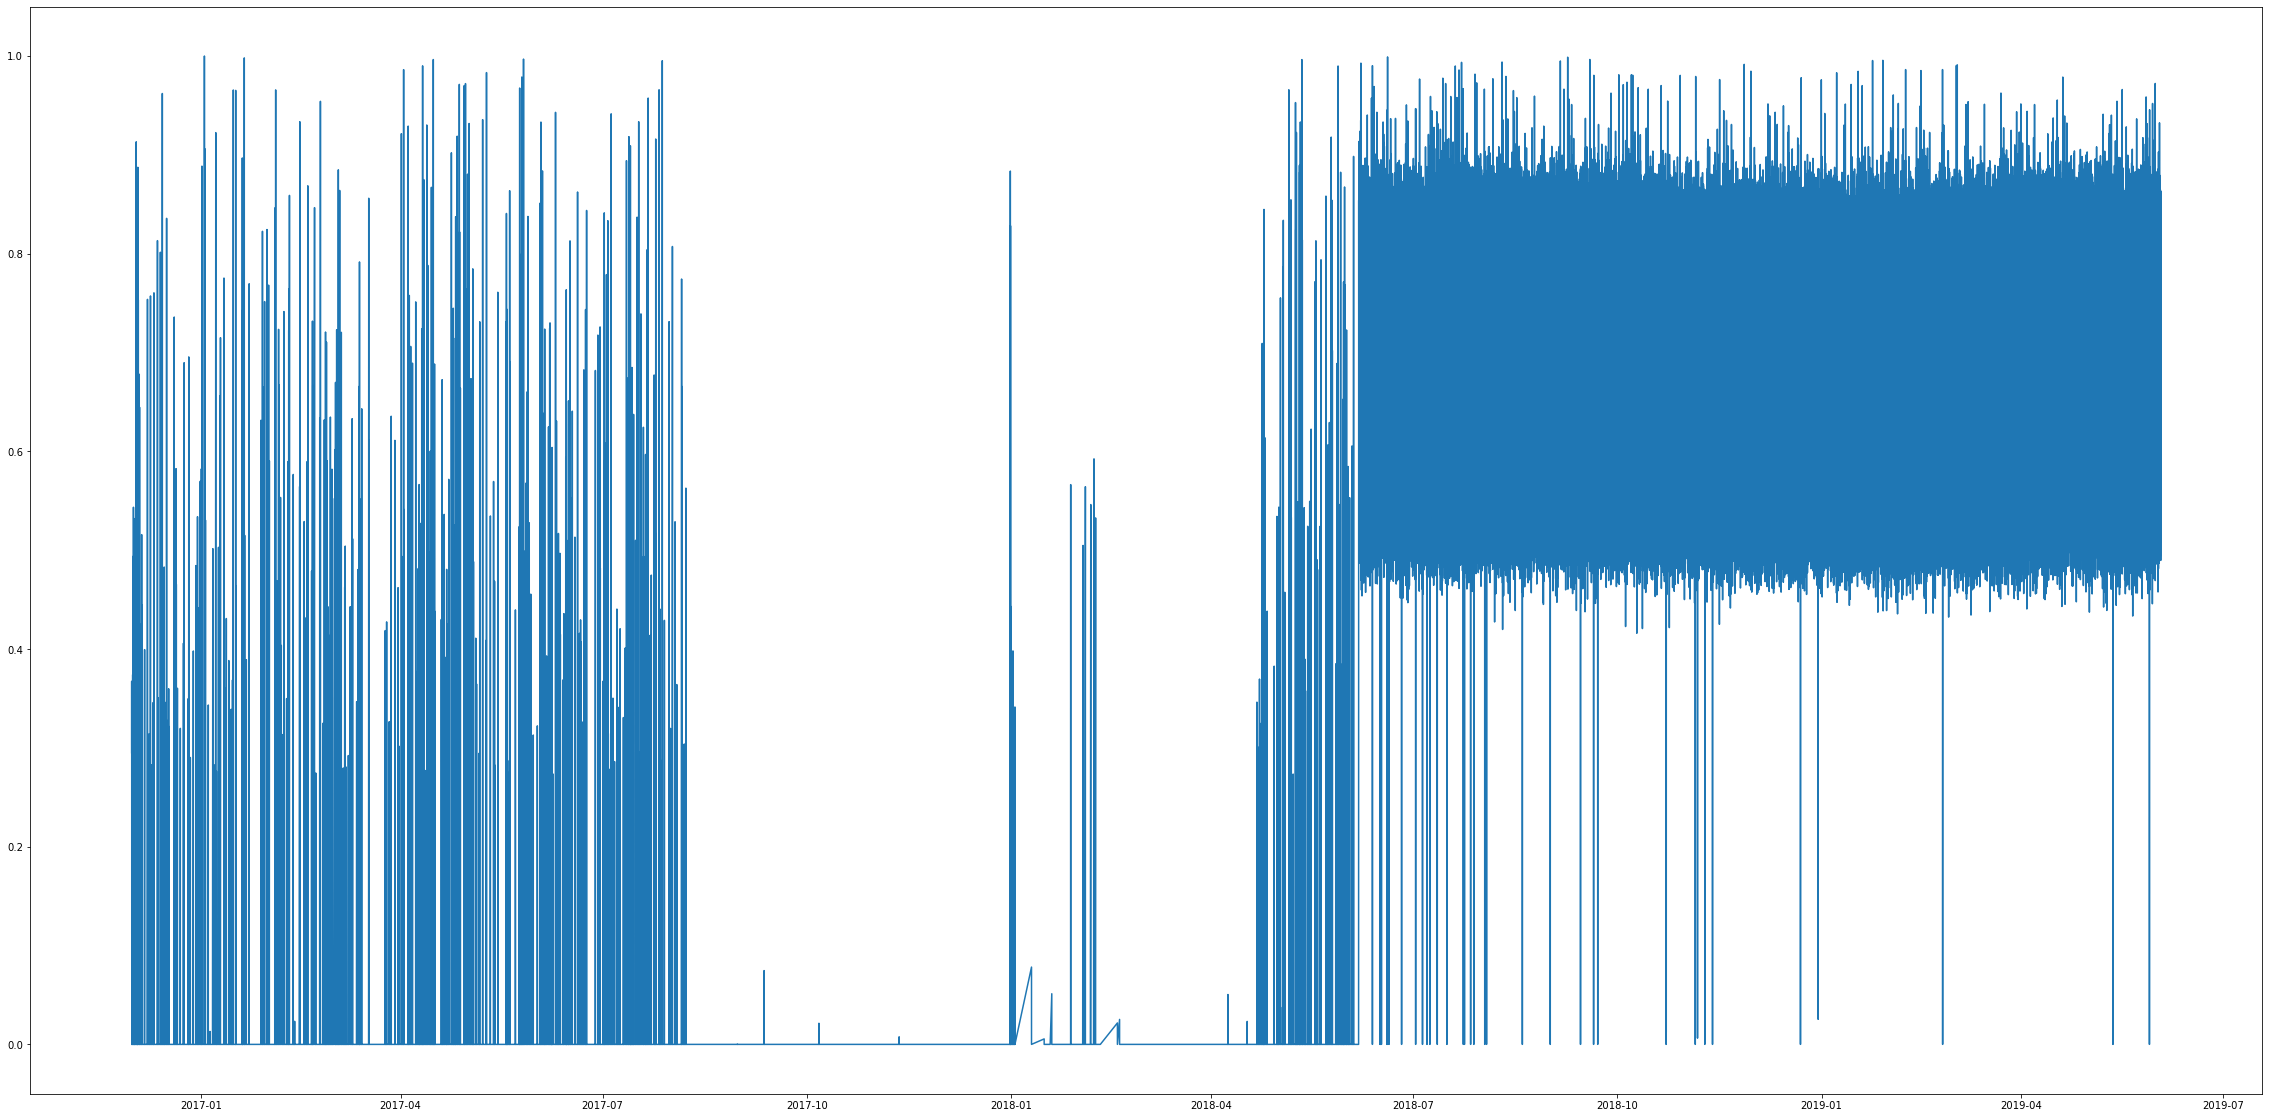

In [232]:
# plt.plot
# (temp_standby)

plt.figure(figsize=(40,20))
plt.plot([datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in temp_standby.index[:]], temp_standby['value'][:])

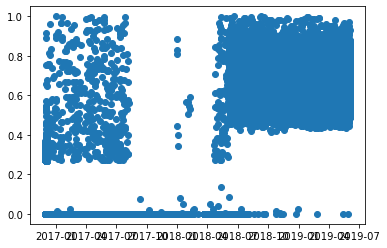

In [233]:
plt.scatter([datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in temp_standby.index[:]], temp_standby['value'][:])

In [185]:
weekday = defaultdict(int)

In [191]:
for i in [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').weekday() for date in temp.index]:
    weekday[i] += 1


In [193]:
weekday

defaultdict(int,
            {2: 4786629,
             3: 4863562,
             4: 4876295,
             5: 4923968,
             6: 4885432,
             0: 4773559,
             1: 4754342})

In [198]:
hour_dict = defaultdict(int)
for i in [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time() for date in temp.index]:
    hour_dict[i] += 1

In [213]:
hour_dict = defaultdict(int)
for i in [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time() for date in temp_nostandby.index]:
    hour_dict[i] += 1

In [220]:
time_df = pd.DataFrame(columns=['freq'])
for k,v in hour_dict.items():
    time_df.loc[k] = v

In [225]:
time_df

,freq
20:38:49,98
20:38:50,99
20:38:51,101
20:38:54,99
20:38:55,98
...,...
23:32:05,72
23:32:06,71
23:32:07,72
03:58:01,66


<AxesSubplot:xlabel='time'>

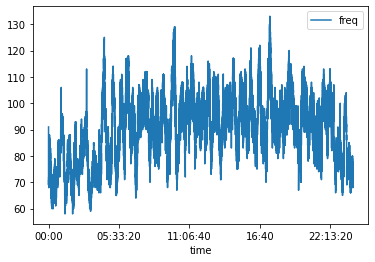

In [223]:
time_df.plot()

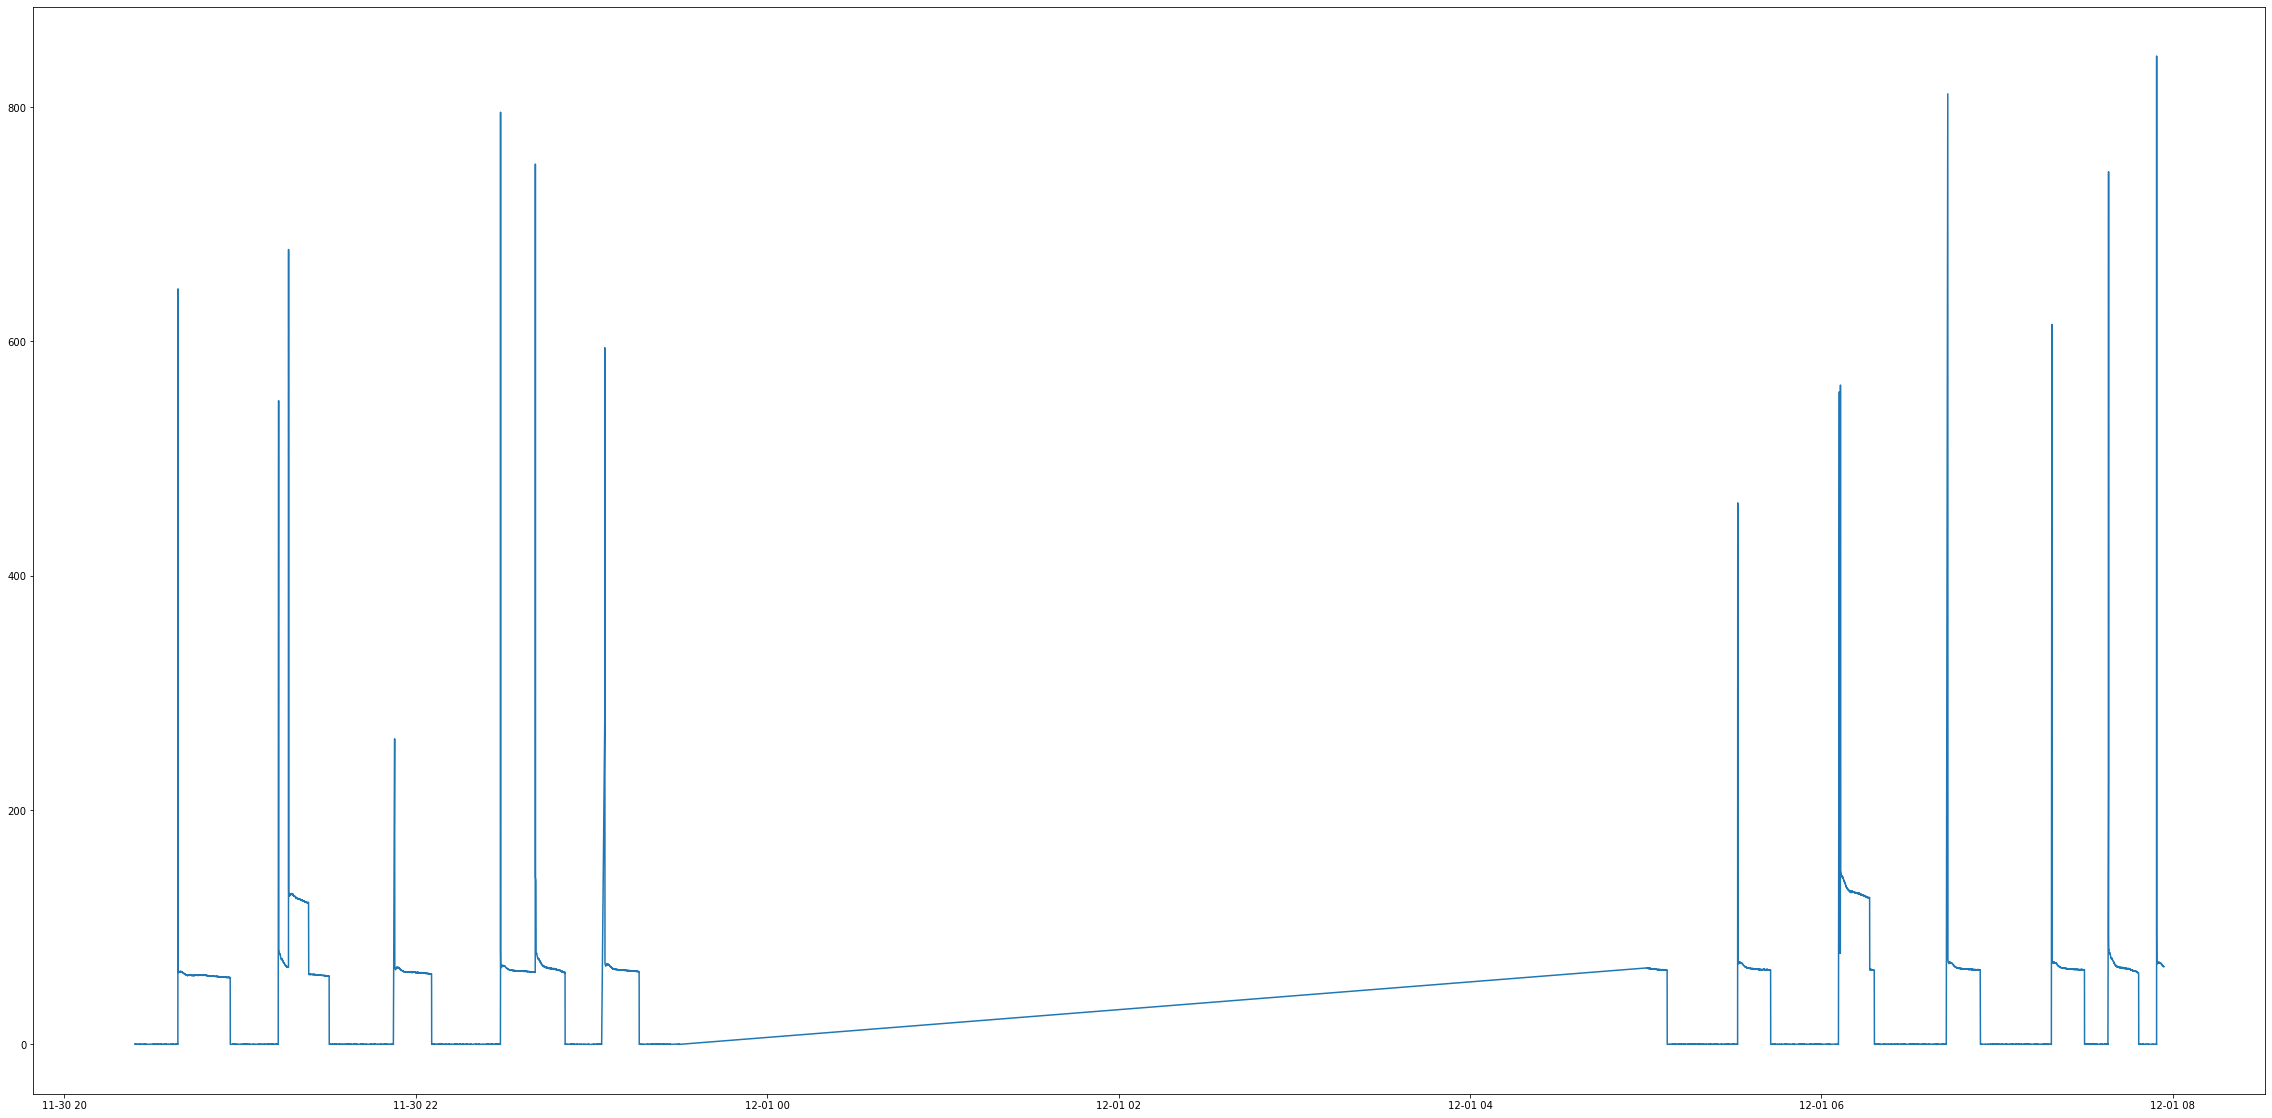

In [192]:
plt.figure(figsize=(40,20))
plt.plot([datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in temp.index[:10000]], temp['value'][:10000])

In [165]:
import datetime
datetime.datetime.strptime(temp.index[0], '%Y-%m-%d %H:%M:%S').weekday()
# temp.index

2

In [30]:
fridge_00_10_time = fridge_00_10['time'].astype('datetime64[s]')

In [64]:
fridge_00_10_time_range = pd.date_range(fridge_00_10_time.iloc[0], fridge_00_10_time.iloc[-1], freq='S')

In [81]:
fridge_00_10_value = [0]*len(fridge_00_10_time_range)

In [107]:
fridge_00_10_total_range = pd.DataFrame(index=fridge_00_10_time_range, columns=['value'])

In [144]:
temp = fridge_00_10[~fridge_00_10.index.duplicated(keep='first')]

In [145]:
temp

,Unnamed: 0,item_id,value
time,,,
2016-11-30 20:24:04,0,10,0.295105
2016-11-30 20:24:05,1,10,0.000000
2016-11-30 20:24:25,2,10,0.314230
2016-11-30 20:24:27,3,10,0.000000
2016-11-30 20:24:45,4,10,0.273080
...,...,...,...
2019-06-02 17:56:12,33937831,10,0.650089
2019-06-02 17:56:13,33937832,10,0.696779
2019-06-02 17:56:14,33937833,10,0.700867


In [142]:
fridge_00_10.index

Index(['2016-11-30 20:24:04', '2016-11-30 20:24:05', '2016-11-30 20:24:25',
       '2016-11-30 20:24:27', '2016-11-30 20:24:45', '2016-11-30 20:24:46',
       '2016-11-30 20:24:47', '2016-11-30 20:24:48', '2016-11-30 20:25:05',
       '2016-11-30 20:25:06',
       ...
       '2019-06-02 17:56:07', '2019-06-02 17:56:08', '2019-06-02 17:56:09',
       '2019-06-02 17:56:10', '2019-06-02 17:56:11', '2019-06-02 17:56:12',
       '2019-06-02 17:56:13', '2019-06-02 17:56:14', '2019-06-02 17:56:15',
       '2019-06-02 17:56:16'],
      dtype='object', name='time', length=33937836)

In [133]:
temp

time
2016-11-30 20:24:04    False
dtype: bool

In [122]:
fridge_00_10.loc[idx]

,Unnamed: 0,item_id,value
time,,,
2016-11-30 21:15:08,1304,10,68.890732
2016-11-30 21:15:08,1305,10,68.934853


In [146]:
cnt=0
for idx in temp.index:
    cnt+=1
    fridge_00_10_total_range.loc[idx, 'value'] = temp.loc[idx, 'value']
    if cnt%10000 == 0:
        print(cnt)
    
# fridge_00_10_total_range

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

KeyboardInterrupt: 

In [110]:
fridge_00_10_total_range

,value
2016-11-30 20:24:04,0.295105
2016-11-30 20:24:05,0.0
2016-11-30 20:24:06,NaN
2016-11-30 20:24:07,NaN
2016-11-30 20:24:08,NaN
...,...
2019-06-02 17:56:12,NaN
2019-06-02 17:56:13,NaN
2019-06-02 17:56:14,NaN
2019-06-02 17:56:15,NaN


In [85]:
fridge_00_10['value']

time
2016-11-30 20:24:04    0.295105
2016-11-30 20:24:05    0.000000
2016-11-30 20:24:25    0.314230
2016-11-30 20:24:27    0.000000
2016-11-30 20:24:45    0.273080
                         ...   
2019-06-02 17:56:12    0.650089
2019-06-02 17:56:13    0.696779
2019-06-02 17:56:14    0.700867
2019-06-02 17:56:15    0.759427
2019-06-02 17:56:16    0.656420
Name: value, Length: 33937836, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (78960733,) and (33937836,)

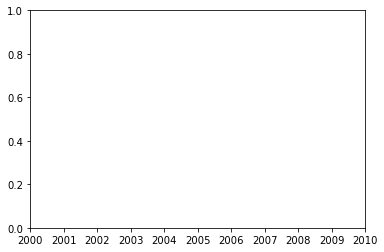

In [78]:
import matplotlib.pyplot as plt
plt.plot(fridge_00_10_time_range, fridge_00_10['value'])

In [71]:
fridge_00_10_time_range

DatetimeIndex(['2016-11-30 20:24:04', '2016-11-30 20:24:05',
               '2016-11-30 20:24:06', '2016-11-30 20:24:07',
               '2016-11-30 20:24:08', '2016-11-30 20:24:09',
               '2016-11-30 20:24:10', '2016-11-30 20:24:11',
               '2016-11-30 20:24:12', '2016-11-30 20:24:13',
               ...
               '2019-06-02 17:56:07', '2019-06-02 17:56:08',
               '2019-06-02 17:56:09', '2019-06-02 17:56:10',
               '2019-06-02 17:56:11', '2019-06-02 17:56:12',
               '2019-06-02 17:56:13', '2019-06-02 17:56:14',
               '2019-06-02 17:56:15', '2019-06-02 17:56:16'],
              dtype='datetime64[ns]', length=78960733, freq='S')

<AxesSubplot:>

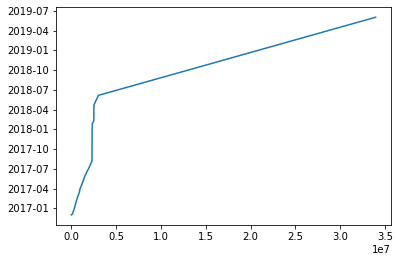

In [32]:
%matplotlib inline
fridge_00_10_time.plot()

In [231]:
temp_sec = temp.iloc[:, 1].astype('datetime64[s]')

In [248]:
np.unique(temp_sec, return_counts=True, return_index=True, return_inverse=True)

(array(['2016-11-30T20:24:04.000000000', '2016-11-30T20:24:05.000000000',
        '2016-11-30T20:24:25.000000000', ...,
        '2019-06-02T17:56:14.000000000', '2019-06-02T17:56:15.000000000',
        '2019-06-02T17:56:16.000000000'], dtype='datetime64[ns]'),
 array([  476687,   476688,   476689, ..., 33937833, 33937834, 33937835],
       dtype=int64),
 array([  923467,   923468,   923469, ..., 33853784, 33853785, 33853786],
       dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [299]:
temp = temp.sort_values(by='time').reset_index(drop=True)

In [280]:
temp['time'].sort_values().reset_index(drop=True)

0          2016-11-30 20:24:04.507750
1          2016-11-30 20:24:05.397355
2          2016-11-30 20:24:25.347019
3          2016-11-30 20:24:27.388297
4          2016-11-30 20:24:45.307474
                      ...            
33937831   2019-06-02 17:56:12.837154
33937832   2019-06-02 17:56:13.853030
33937833   2019-06-02 17:56:14.878932
33937834   2019-06-02 17:56:15.905543
33937835   2019-06-02 17:56:16.826638
Name: time, Length: 33937836, dtype: datetime64[ns]

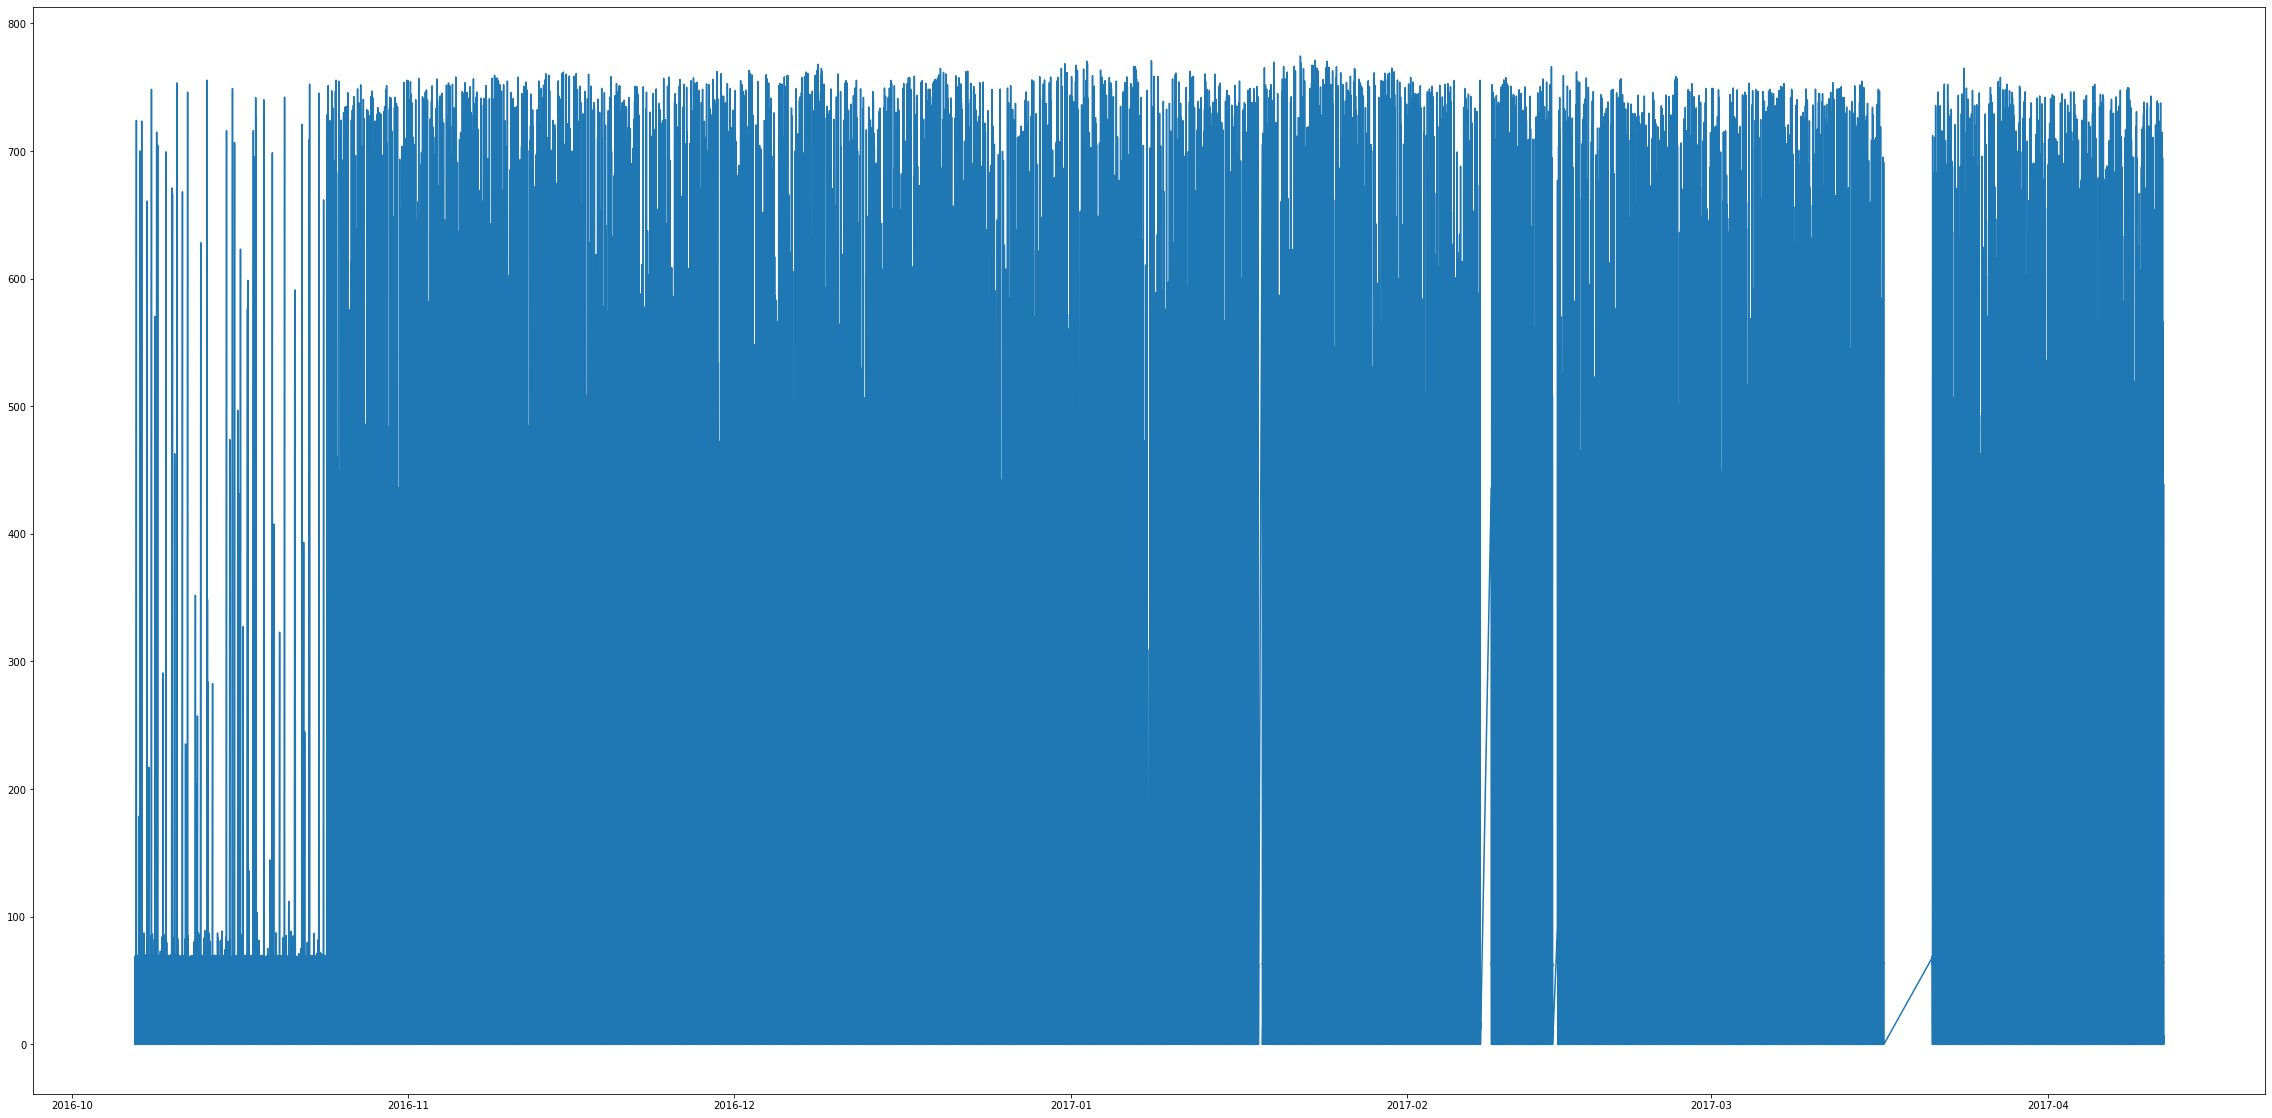

In [347]:
plt.figure(figsize=(40,20))
plt.plot(temp.iloc[:, 1].astype('datetime64[s]'), temp.iloc[:, 2])

In [260]:
t = 0
temp.iloc[t:t+20, 1]

0    2017-03-24 22:12:28.479372
1    2017-03-24 22:12:29.311849
2    2017-03-24 22:12:30.317462
3    2017-03-24 22:12:31.310413
4    2017-03-24 22:12:32.319137
5    2017-03-24 22:12:33.310296
6    2017-03-24 22:12:34.312637
7    2017-03-24 22:12:35.312469
8    2017-03-24 22:12:36.308183
9    2017-03-24 22:12:37.316479
10   2017-03-24 22:12:38.311627
11   2017-03-24 22:12:39.328344
12   2017-03-24 22:12:40.358574
13   2017-03-24 22:12:41.316684
14   2017-03-24 22:12:42.311782
15   2017-03-24 22:12:43.306644
16   2017-03-24 22:12:44.306929
17   2017-03-24 22:12:45.307125
18   2017-03-24 22:12:46.310305
19   2017-03-24 22:12:47.311198
Name: time, dtype: datetime64[ns]

In [230]:
temp[temp.iloc[:, 1].astype('datetime64[s]').duplicated()], temp.iloc[:, 1].astype('datetime64[s]')[temp.iloc[:, 1].astype('datetime64[s]').duplicated()]

(          item_id                       time      value
 1683           10 2017-03-25 03:00:00.309908  64.716858
 3600           10 2017-03-25 07:40:39.325237  64.793419
 4339           10 2017-03-25 09:00:00.318084  64.258408
 5667           10 2017-03-25 12:00:00.310444  63.582661
 6763           10 2017-03-25 14:58:17.339079  64.840569
 ...           ...                        ...        ...
 33934878       10 2019-06-02 17:01:09.809675   0.695196
 33934881       10 2019-06-02 17:01:12.808723   0.658201
 33936119       10 2019-06-02 17:25:14.805830   0.604059
 33937661       10 2019-06-02 17:53:20.837356   0.668290
 33937665       10 2019-06-02 17:53:24.995059   0.699614
 
 [84049 rows x 3 columns],
 1683       2017-03-25 03:00:00
 3600       2017-03-25 07:40:39
 4339       2017-03-25 09:00:00
 5667       2017-03-25 12:00:00
 6763       2017-03-25 14:58:17
                    ...        
 33934878   2019-06-02 17:01:09
 33934881   2019-06-02 17:01:12
 33936119   2019-06-02 17:25:14

In [78]:
house_00_data = pd.read_csv("./house_00/item_0010_data.tsv", sep='\t')

In [194]:
house_01_data = pd.read_csv("./house_01/item_0004_data.tsv", sep='\t')

In [199]:
np.array(house_01_data['time'], dtype='datetime64')

array(['2017-03-23T06:00:13.815282', '2017-03-23T06:00:14.760592',
       '2017-03-23T06:00:25.736037', ..., '2017-03-16T19:00:00.055916',
       '2017-03-16T20:00:00.056378', '2017-03-16T21:00:00.050200'],
      dtype='datetime64[us]')

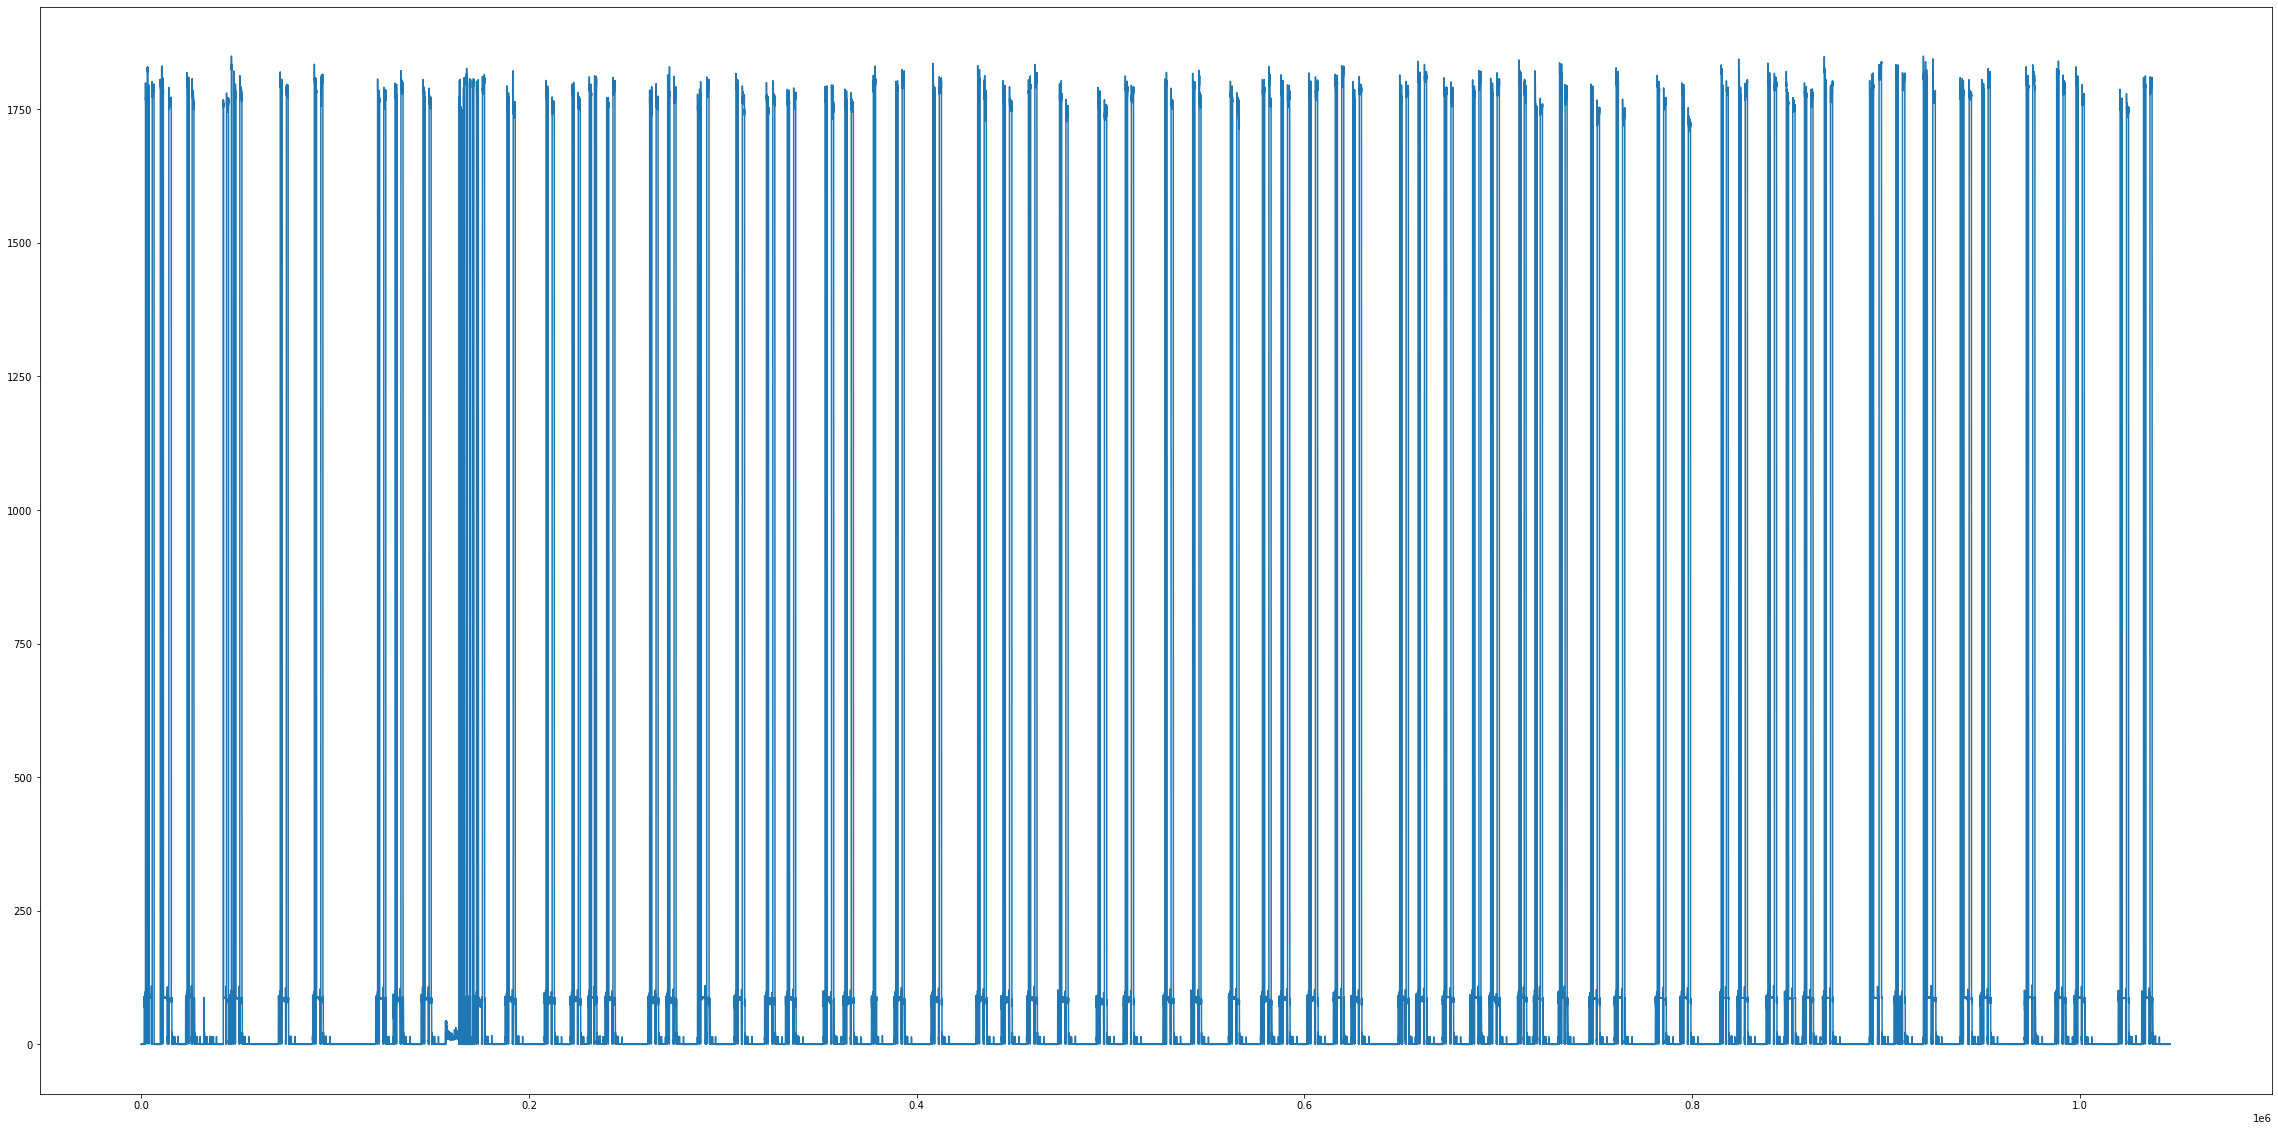

In [196]:
plt.figure(figsize=(40,20))
plt.plot(house_01_data['value'])

In [137]:
temp = house_00_data
temp['time2'] = temp['time']

In [126]:
temp.iloc[0, 3]

'2017-03-24 22:12:28.479372'

In [138]:
short_time = np.zeros_like(temp.iloc[:,3])

In [139]:
cnt = 0
for i in temp.to_numpy()[:,3]:
    time = arrow.get(i).format("YYYYMMDDhhmmss")
    short_time[cnt] = time
    cnt += 1
    if cnt % 10000 == 0:
        print(cnt)
    

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [142]:
house_00_data['time'] = short_time

In [156]:
time_col = house_00_data['time']

In [160]:
np.array(time_col)

array(['20170324101228', '20170324101229', '20170324101230', ...,
       '20190602055614', '20190602055615', '20190602055616'], dtype=object)

In [171]:
datetime_col = np.array(temp['time2'], dtype='datetime64')

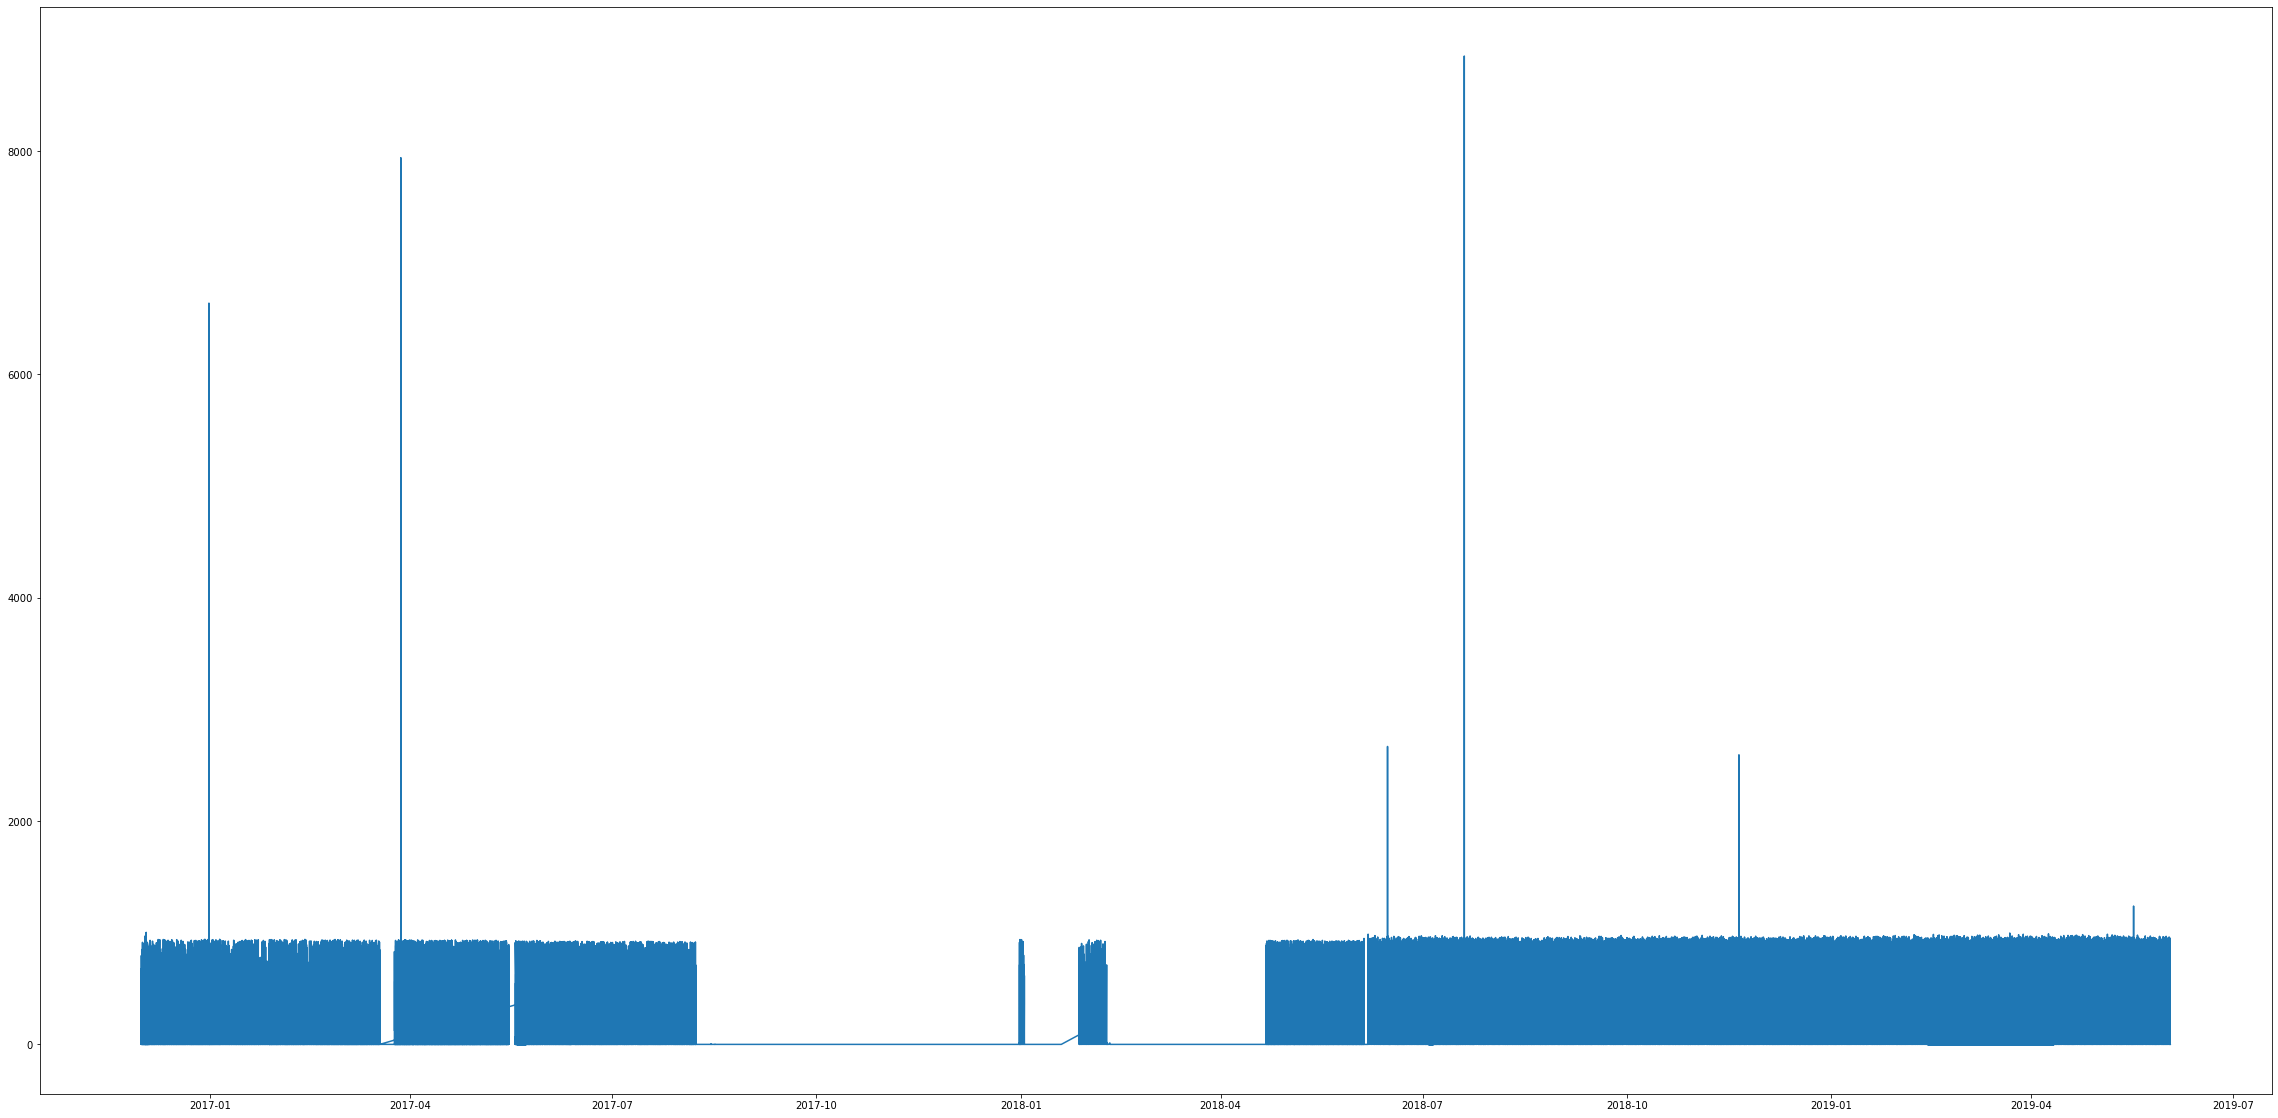

In [177]:
plt.figure(figsize=(40,20))
plt.plot(datetime_col, temp['value'])

In [166]:
datetime_col = np.array(time_col, dtype='datetime64')

In [198]:
pd.DataFrame(datetime_col)

,0
0,2017-03-24 22:12:28.479372
1,2017-03-24 22:12:29.311849
2,2017-03-24 22:12:30.317462
3,2017-03-24 22:12:31.310413
4,2017-03-24 22:12:32.319137
...,...
33937831,2019-06-02 17:56:12.837154
33937832,2019-06-02 17:56:13.853030
33937833,2019-06-02 17:56:14.878932
33937834,2019-06-02 17:56:15.905543
